In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
data=pd.read_excel('data.xlsx')

1. Preliminary analysis:

Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Identifying unique values
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
#NO NULL VALUES ARE PRESENT

In [12]:
#Identifying duplicate values
duplicate_data=data[data.duplicated(keep='first')]

In [13]:
duplicate_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
#ONLY ONE DUPLICATE VALUE IS PRESENT

summary
1)No null values are present
2)only one duplicate value is present

2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
Study the occurrence of CVD across Age.
Study the composition of overall patients w.r.t. Gender.
Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
Describe the relationship between Cholesterol levels and our target variable.
What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.
Is thalassemia a major cause of CVD?
How are the other factors determining the occurrence of CVD?
Use a pair plot to understand the relationship between all the given variables.

In [15]:
# statistical summary of the data
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

Text(0.5, 1.0, 'disease classes')

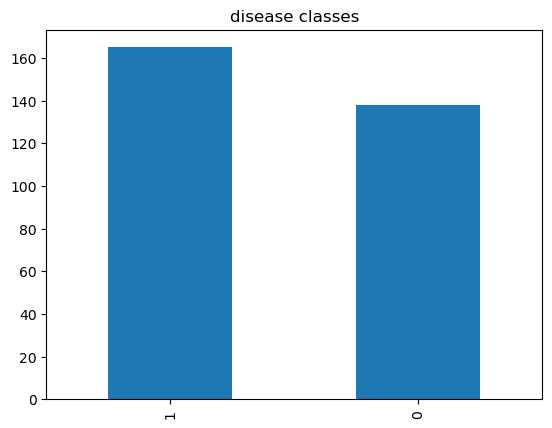

In [16]:
data['target'].value_counts().plot(kind='bar')
plt.title('disease classes')

In [17]:
#Study the occurrence of CVD across Age. Study the composition of overall patients w.r.t. Gender. 

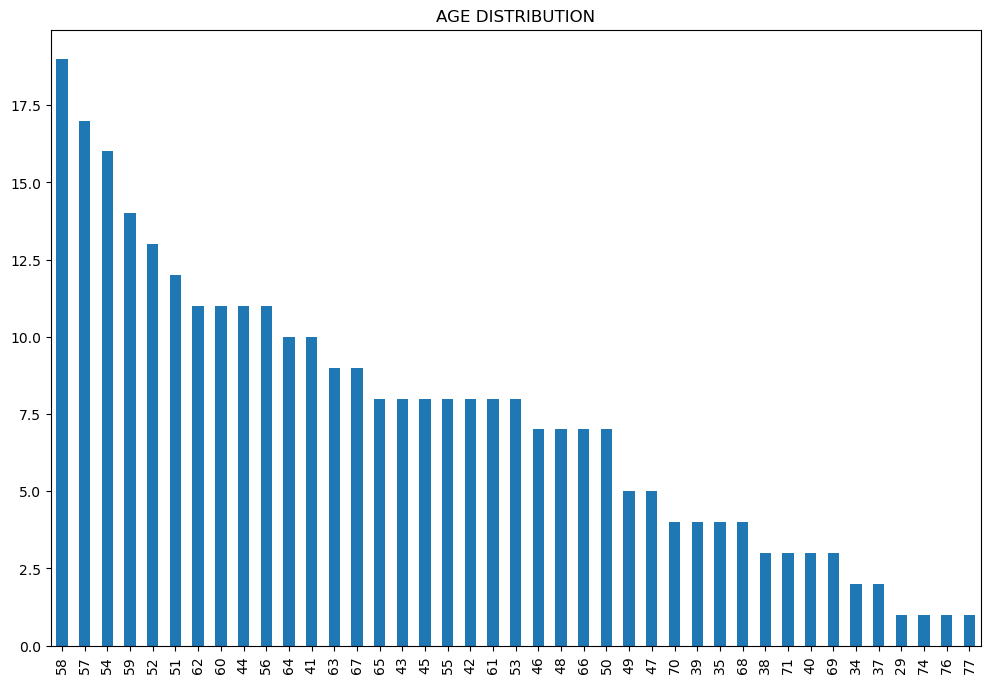

<Figure size 1200x800 with 0 Axes>

In [18]:
#distribution of age
plt.figure(figsize=(12,8))
data['age'].value_counts().plot(kind='bar')
plt.title('AGE DISTRIBUTION')
plt.figure(figsize=(12,8))
plt.show()

In [19]:
#MOST OF THE PATIENTS ARE AGED 54,57 AND 58.

plt.figure(figsize=(12,8))
sns.histplot(x=data['age'],hue='target',data=data)
plt.show()

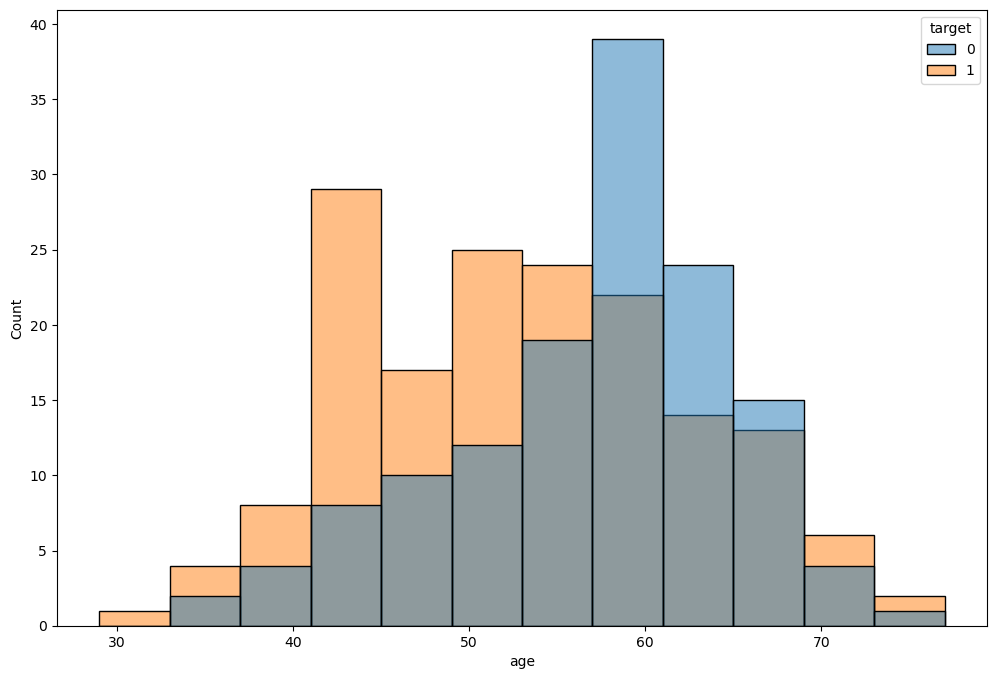

<Figure size 1200x800 with 0 Axes>

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(x=data['age'],hue='target',data=data)
plt.figure(figsize=(12,8))
plt.show()

In [21]:
#MOST PATIENTS HAVING HEART DISEASE ARE AGED BETWEEN 40 AND 50.

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
print(data['sex'].value_counts())
#1 male,0 female

1    207
0     96
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

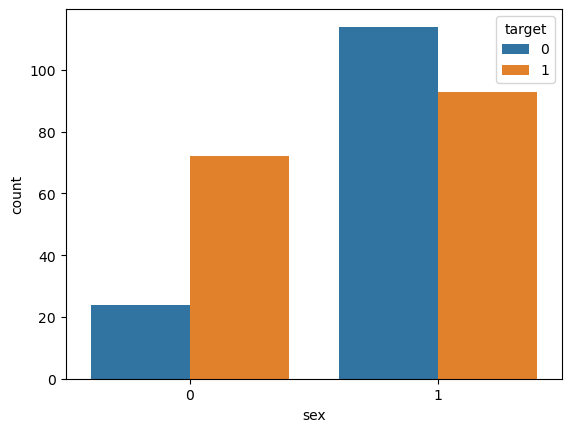

In [24]:
sns.countplot(x=data['sex'],hue='target',data=data)

In [25]:
#chest pain
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

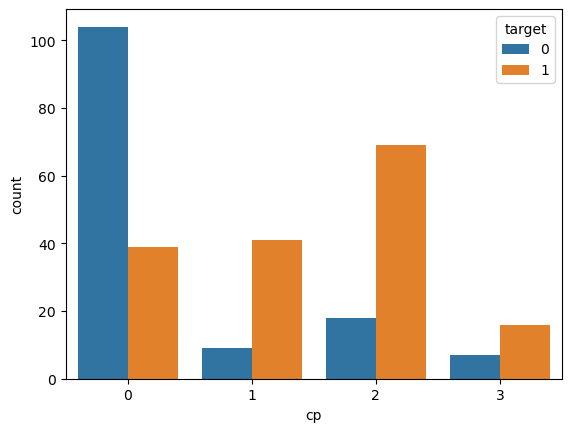

In [26]:
sns.countplot(x=data['cp'],hue='target',data=data)

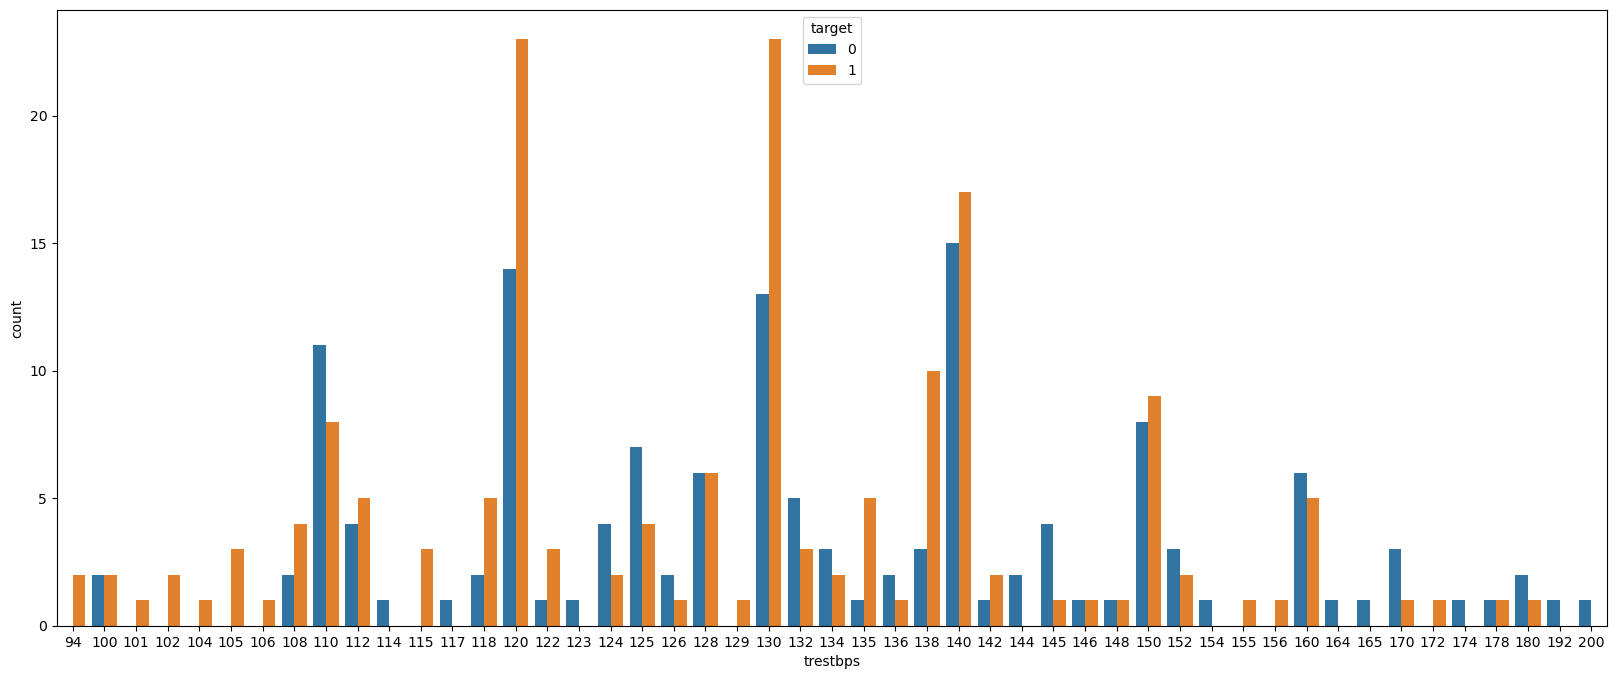

In [27]:
#Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
#resting blood pressure
plt.figure(figsize=(20,8))
sns.countplot(x=data['trestbps'],hue='target',data=data)
plt.show()

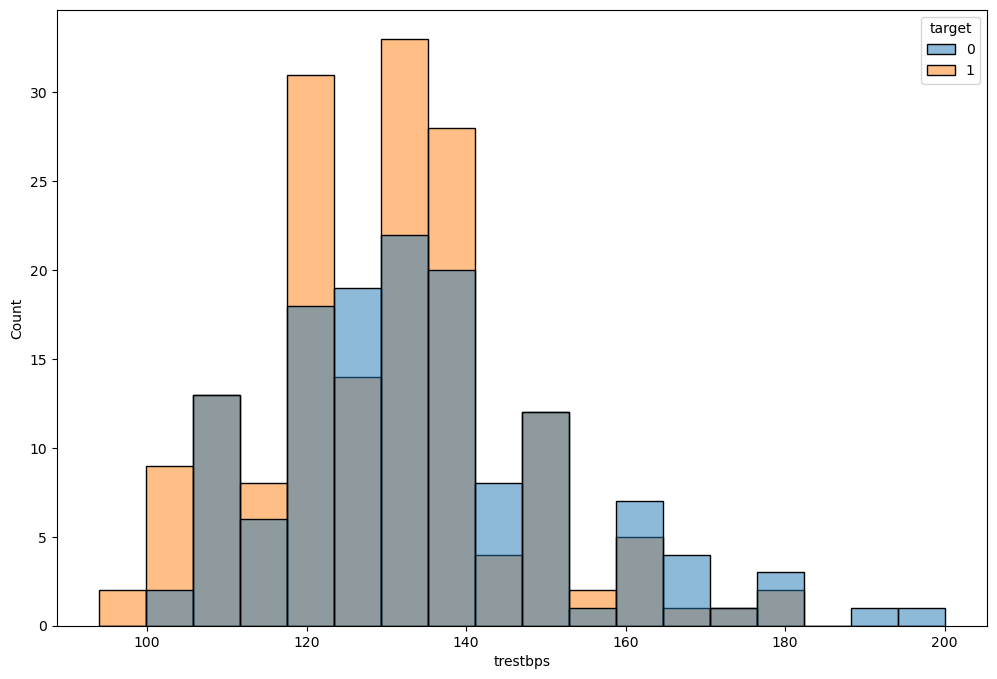

<Figure size 1200x800 with 0 Axes>

In [28]:
#resting blood pressure
plt.figure(figsize=(12,8))
sns.histplot(x=data['trestbps'],hue='target',data=data)
plt.figure(figsize=(12,8))
plt.show()

In [29]:
#DECEASED PATIENTS HAVING RESTING BLOOD pressure are betwwn 120 andd 130 high for 120 and 130.

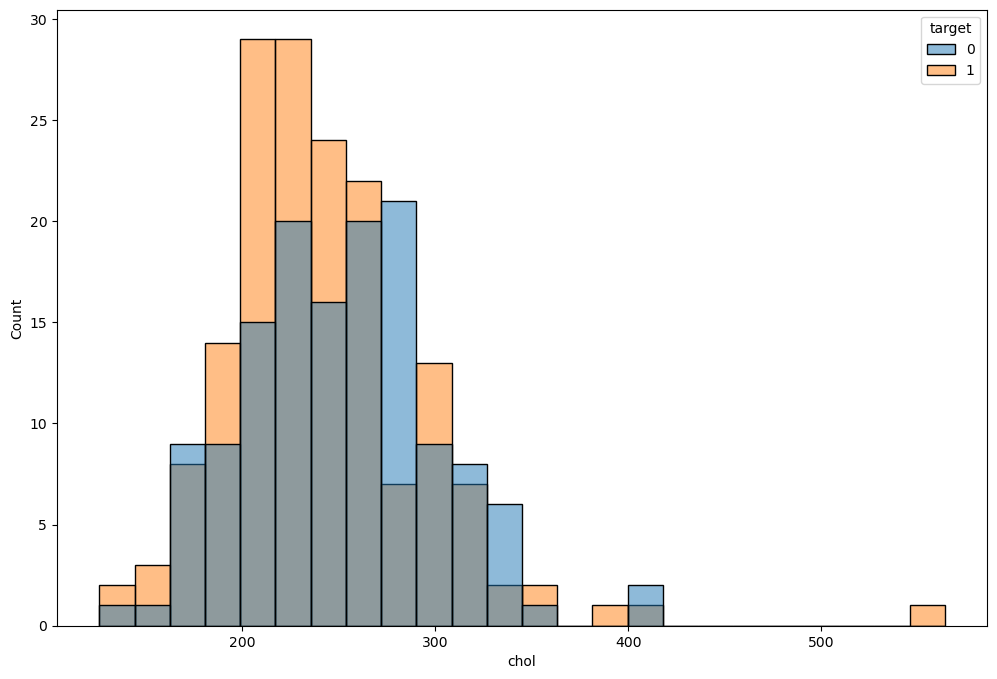

<Figure size 1200x800 with 0 Axes>

In [30]:
#CHOLESTROL
plt.figure(figsize=(12,8))
sns.histplot(x=data['chol'],hue='target',data=data)
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
#deceased patients has cholestrol range between 200 and 300.

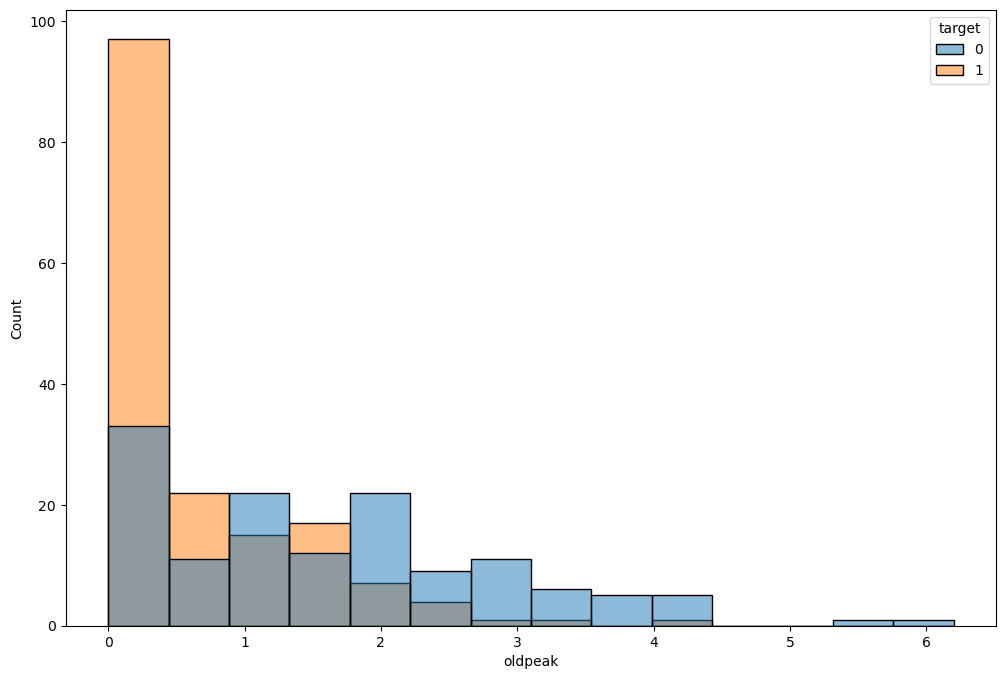

<Figure size 1200x800 with 0 Axes>

In [31]:
#peak exercising
plt.figure(figsize=(12,8))
sns.histplot(x=data['oldpeak'],hue='target',data=data)
plt.figure(figsize=(12,8))
plt.show()

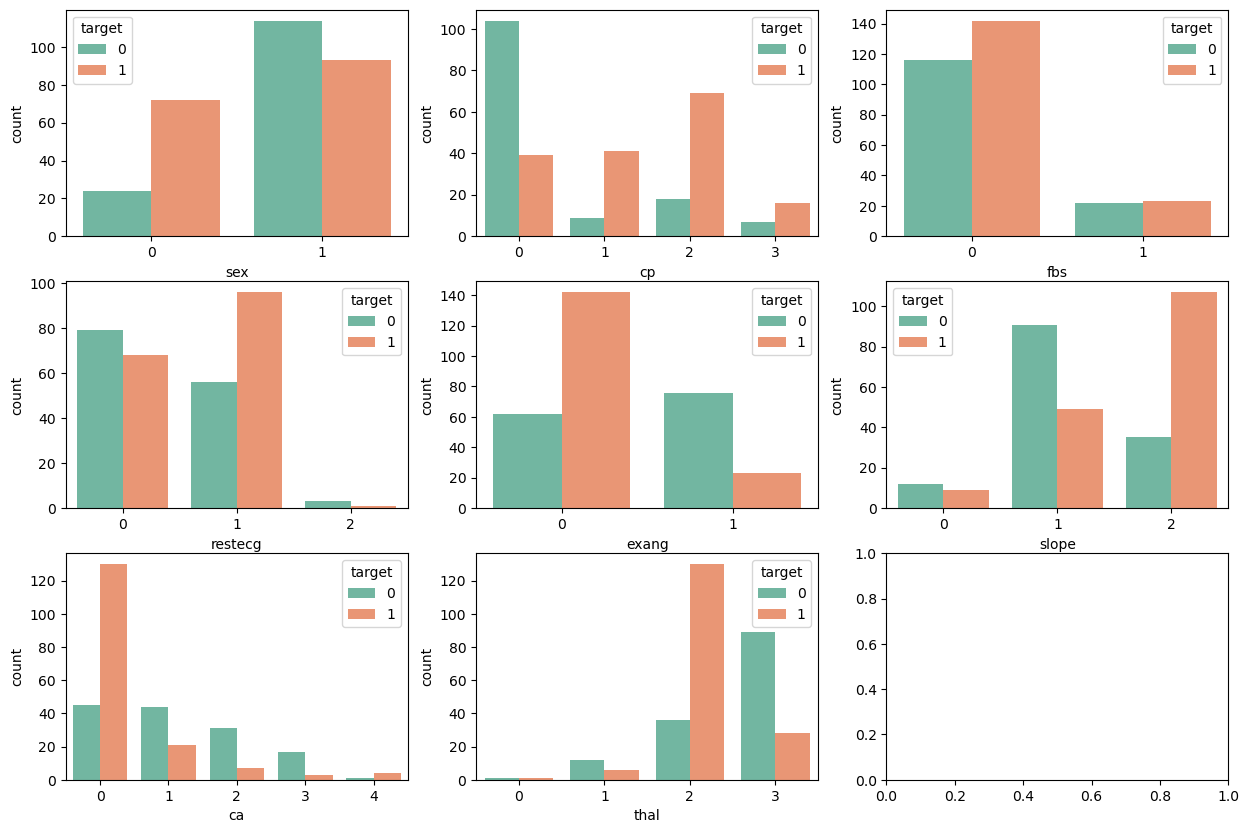

In [25]:
# Create a subplot

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))

cat_features=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for idx,feature in enumerate(cat_features):

    if feature!='target':

        ax=axes[int(idx/3),idx%3]

        sns.countplot(x=feature,hue='target',ax=ax,data=data,palette='Set2')

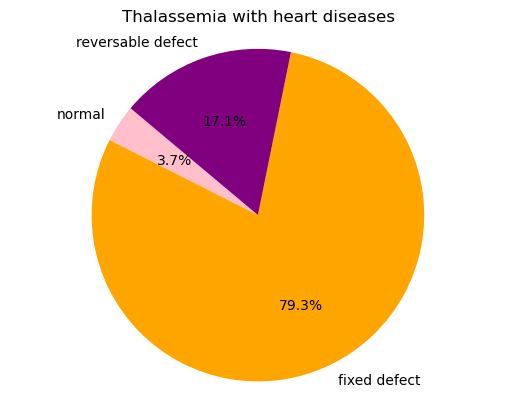

In [26]:
# Create pie chart- thalsemia have heart diseases
labels='normal','fixed defect','reversable defect'
sizes=[6,130,28]
colors=['pink','orange','purple']
plt.pie(sizes,labels=labels,autopct='%.1f%%',colors=colors,startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart diseases')
plt.show()

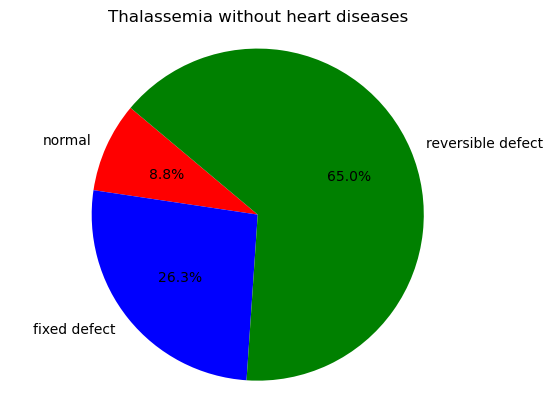

In [27]:
# Create pie chart- have thalsemia with no heart diseases
labels='normal','fixed defect','reversible defect'
sizes=[12,36,89]
colors=['red','blue','green']
plt.pie(sizes,labels=labels,autopct='%.1f%%',colors=colors,startangle=140)
plt.axis('equal')
plt.title('Thalassemia without heart diseases')
plt.show()

In [28]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

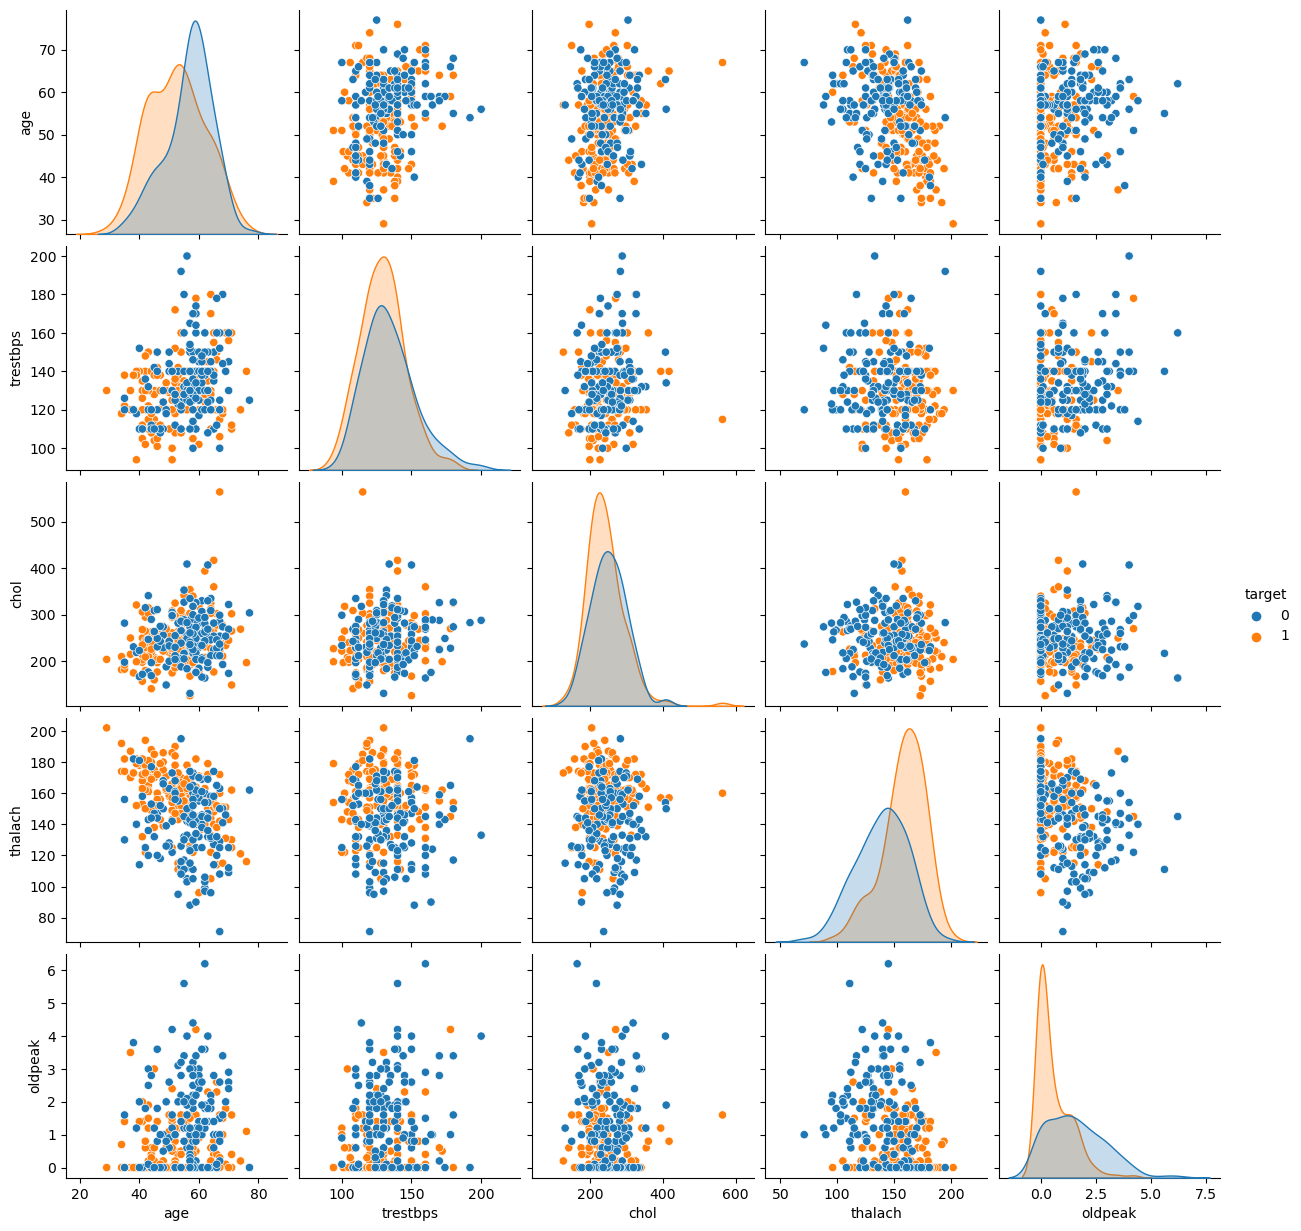

In [29]:
num_var=['age', 'trestbps', 'chol', 'thalach','oldpeak']
sns.pairplot(data[num_var+['target']],hue='target')

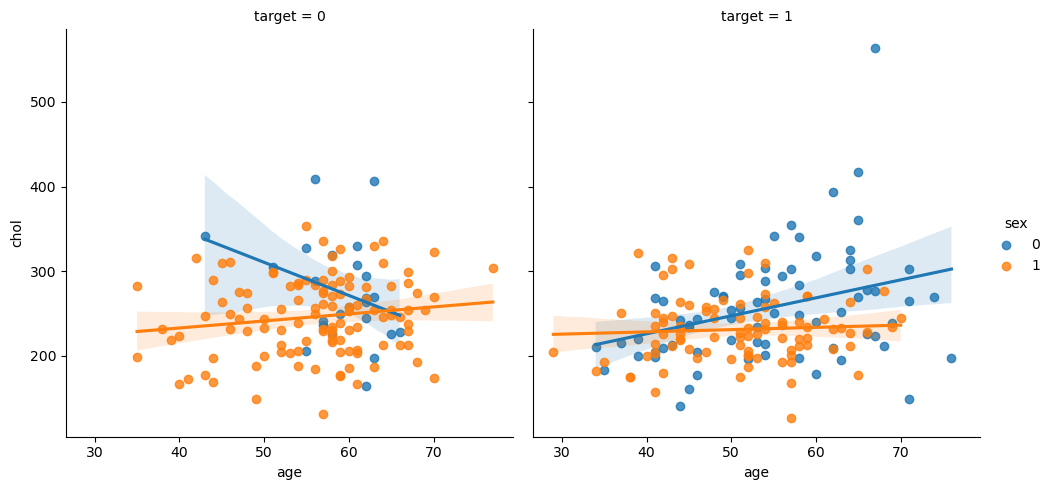

In [30]:
# create a plot to understand relationship between age & cholestrol, according to target
sns.lmplot(x='age',y='chol',hue='sex',col='target',data=data)
plt.show()

In [31]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

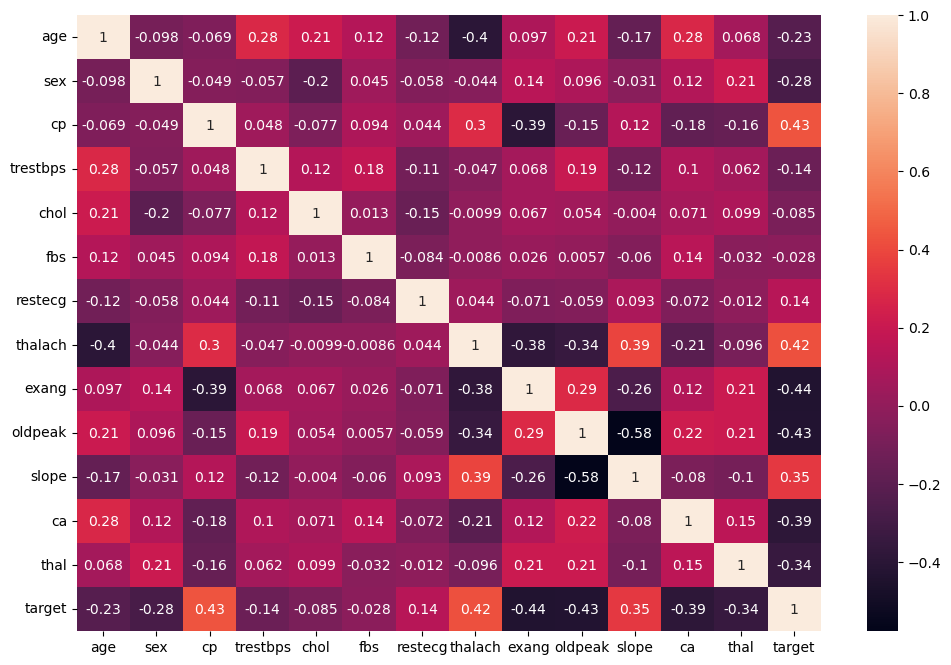

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

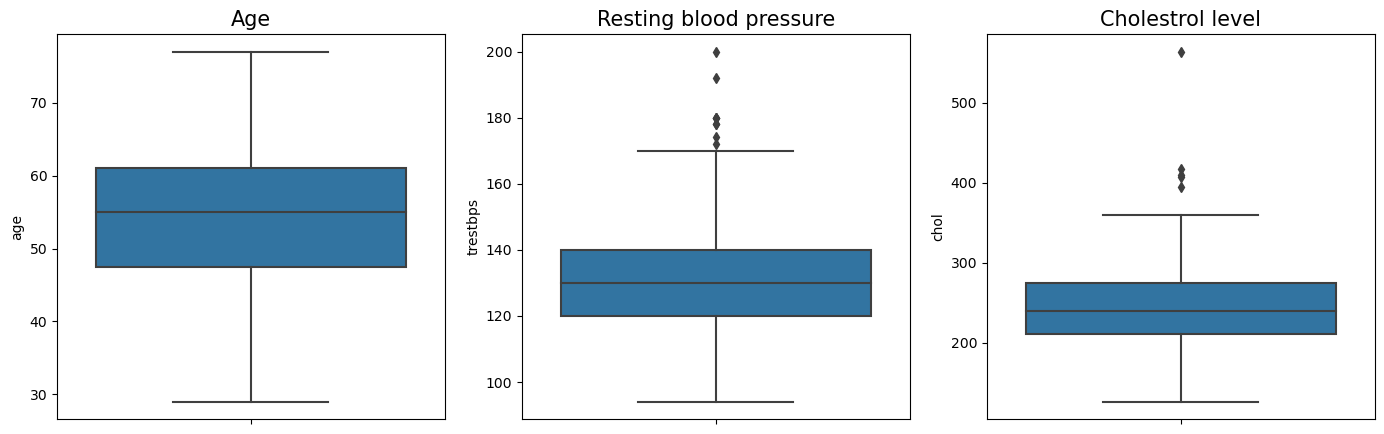

In [33]:
#Create a subplot
plt.figure(figsize=(17,5)) 
plt.subplot(1,3,1) 
sns.boxplot(y= data['age']) 
plt.title('Age', fontsize=15) 
plt.subplot(1,3,2) 
sns.boxplot(y= data['trestbps']) 
plt.title('Resting blood pressure', fontsize=15) 
plt.subplot(1,3,3) 
sns.boxplot(y= data['chol']) 
plt.title('Cholestrol level', fontsize=15) 
plt.show()

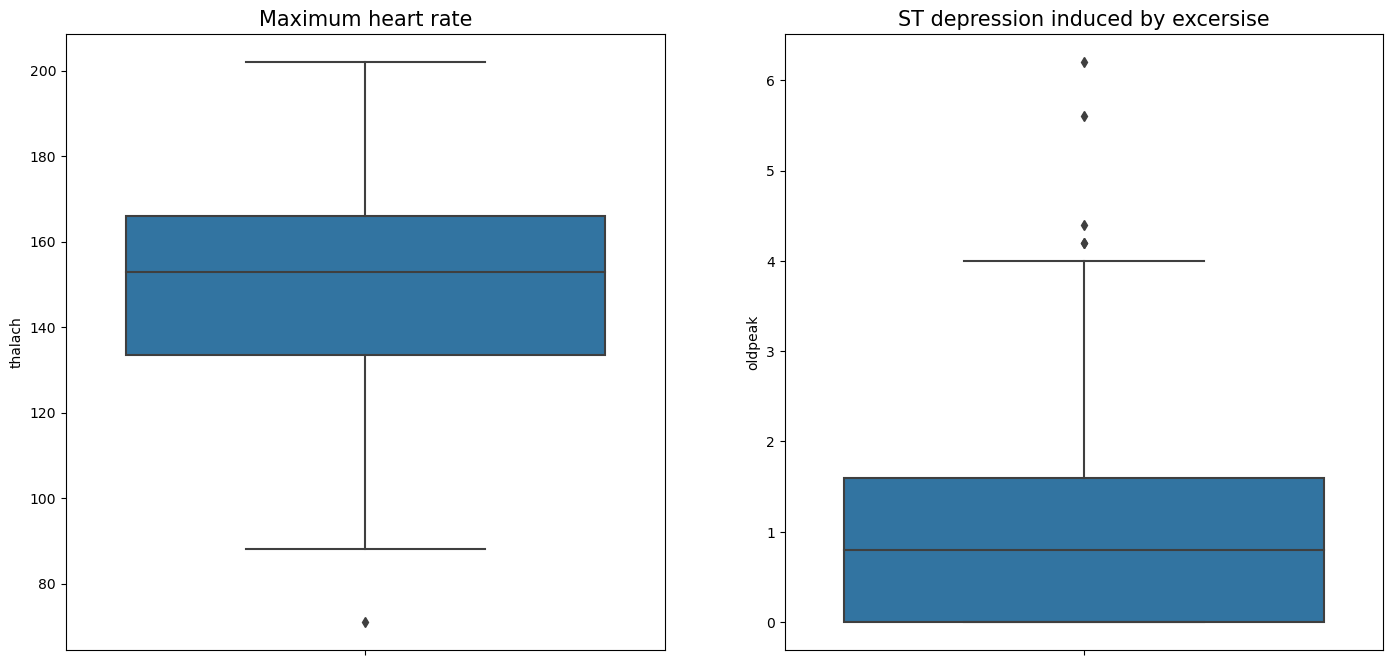

In [34]:
plt.figure(figsize=(17,8)) 
plt.subplot(1,2,1) 
sns.boxplot(y= data['thalach']) 
plt.title('Maximum heart rate', fontsize=15) 
plt.subplot(1,2,2) 
sns.boxplot(y= data['oldpeak']) 
plt.title('ST depression induced by excersise',fontsize=15) 
plt.show()

Build a baseline model to predict using a Logistic Regression and explore the results.
seperate independent and dependent variable
create train set and test set
scaling
applying classification algorithm
Evaluate the model.

In [35]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
# seperate dependent and independent variable
X=data.drop(['target'],axis=1)
y=data['target']

In [54]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [55]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [56]:
#create train amd test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [58]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [65]:
X_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [60]:
from sklearn.linear_model import LogisticRegression
loc_regression=LogisticRegression()

In [62]:
loc_regression.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred=loc_regression.predict(X_test)

In [64]:
#y predicted
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [66]:
# actual y test
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [68]:
y_test.shape

(91,)

In [69]:
y_pred.shape

(91,)

In [67]:
#evaluate how much the model is accurate
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[32  9]
 [ 8 42]]


In [ ]:
#accuracy prediction
#32+9/32+9+8+42  tp+tn/tp+tn+fp+fn

In [70]:
# print accuracy & classification report
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.8131868131868132


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
#Accuracy of our model is 81%